In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### 1. Dataset

In [9]:
dataset = pd.read_csv("occupancy.csv")
dataset

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [28]:
X = dataset[['CO2', 'Light', 'Humidity']].values
y = dataset[['Occupancy']].values
X.shape, y.shape

((2665, 3), (2665, 1))

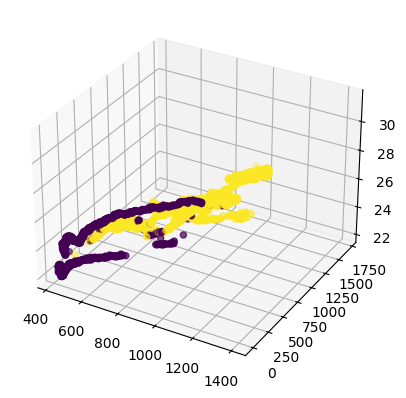

In [11]:
# show the 3 dimentions of the dataset
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
plt.show()

### 2. Modèle


In [12]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [14]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A


W,b=initialisation(X)
modele(X, W, b)

### 3. Fonction Coût 

In [15]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))


### 4. Optimisation - Gradient et Descente de Gradient

In [16]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)


In [17]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)


### 5. Prédiction

In [18]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5


In [19]:
# split the data 
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 5. Modèle final

In [20]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b


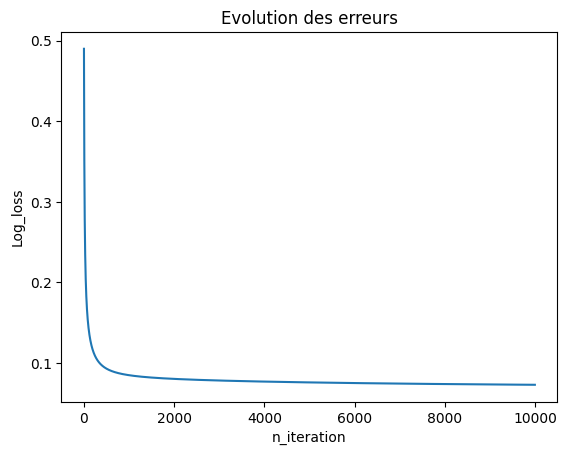

In [21]:
W,b=regression_logistique(X_train, y_train)

### 5. 1 Evaluation du modèle et Visualisation


In [30]:
from sklearn.metrics import accuracy_score

y_pred = predict(X_train, W, b)
print("Accuracy=",accuracy_score(y_train, y_pred))

[[1.76724541e-03]
 [9.91016077e-01]
 [9.99720258e-01]
 ...
 [8.67618371e-01]
 [9.90859159e-01]
 [5.99188351e-04]]
Accuracy= 0.9774798927613941


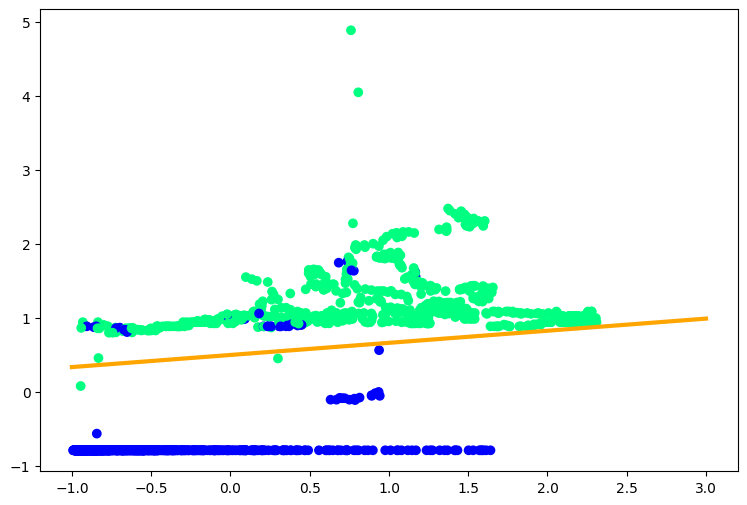

In [23]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(-1, 3, 200)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)


plt.show()

## Test

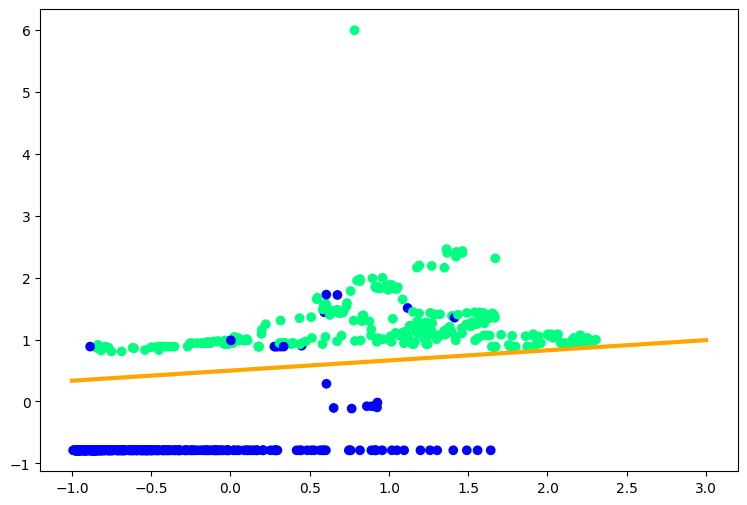

In [24]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X_test[:,0], X_test[:, 1], c=y_test, cmap='winter')

# Dessiner la frontière de décision
ax.plot(x1, x2, c='orange', lw=3)


plt.show()

In [25]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X_train, W, b)
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[1.76724541e-03]
 [9.91016077e-01]
 [9.99720258e-01]
 ...
 [8.67618371e-01]
 [9.90859159e-01]
 [5.99188351e-04]]
[[1130   39]
 [   3  693]]


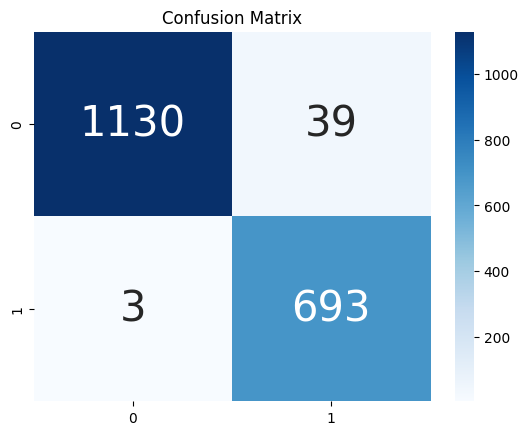

In [26]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()